<a href="https://colab.research.google.com/github/vandarsar/Linear-regression/blob/main/(Predicting_Customer_Churn_%26_Segmenting_Customers_(machine_Learning_for_marketing_analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing relavant libraries

In [ ]:
# Import all methods and dataset that you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # MAE, RMSE, R2 score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler #standardization scaler library
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet    #importing ElasticNet library
from sklearn.cluster import KMeans  # importing kmeans for unsupervised learning  
from sklearn.decomposition import NMF     # Non matrix factorisation
from sklearn.tree import DecisionTreeClassifier # importing decision tree classifier for supervised leaning
from sklearn.metrics import accuracy_score, precision_score, recall_score   # accruacy_score for calculating models' accuracies
#import mplfinance as mpf            # for mpl finance
import plotly.graph_objects as go   # importing plotly
from sklearn import tree # for visualising the tree leafs and nodes
import graphviz # helps visualise decision tree
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE # Automatic feature selections
from sklearn.impute import SimpleImputer    # for imputing data into missing datapoints
import datetime as dt


In [ ]:
fpath = 'https://assets.datacamp.com/production/repositories/4976/datasets/252c7d50740da7988d71174d15184247463d975c/telco.csv'

In [ ]:
df = pd.read_csv(fpath)
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.customerID.count(), df.customerID.nunique()

(7043, 7043)

In [ ]:
# return columns in df.columns where df data types is already categorical data and/(depending on if the columns already have some categorical columns) & df.nunique < 10
# I used != because It I was now sure no categorical column existed in the dataframe
#numeric_but_indeed_categorical =[col for col in df.columns if df.dtype =="O" and/or df[col].nunique() < 10] this can also be used as a filter
numeric_but_indeed_categorical_col =[col for col in df.columns if df[col].nunique() < 10]

In [ ]:
numeric_but_indeed_categorical_col


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
numeric_but_indeed_categorical_col.pop()

'Churn'

In [ ]:
numeric_but_indeed_categorical_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
df_categorical_col = pd.get_dummies(data = df[numeric_but_indeed_categorical_col], columns = numeric_but_indeed_categorical_col, drop_first=True) # pass numeric_but_indeed_categorical to pd.get_dummies to create dummy variables.

df_categorical_col.columns

Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df_categorical_col

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
target =["Churn"]  # define the targets
customer_id = ["customerID"]  # also isolate customer_id

real_numerical_columns = [x for x in df.columns if x not in target+customer_id+numeric_but_indeed_categorical_col]  # to isolate the numerical columns
real_numerical_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df_numeric = pd.DataFrame(df[real_numerical_columns])
df_numeric["TotalCharges"] = pd.to_numeric(df_numeric.TotalCharges, errors='coerce') # coerce will force any non-complying row to NAN

In [ ]:
df_numeric.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [ ]:
# Scaling the numeric columns
scaler = StandardScaler()
scaled_numerical_col = scaler.fit_transform(df_numeric)
scaled_numerical_columms = pd.DataFrame(scaled_numerical_col, columns=df_numeric.columns)
scaled_numerical_columms

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194
1,0.066327,-0.259629,-0.173740
2,-1.236724,-0.362660,-0.959649
3,0.514251,-0.746535,-0.195248
4,-1.236724,0.197365,-0.940457
...,...,...,...
7038,-0.340876,0.665992,-0.129180
7039,1.613701,1.277533,2.241056
7040,-0.870241,-1.168632,-0.854514
7041,-1.155283,0.320338,-0.872095


In [ ]:
scaled_numerical_columms.describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.032000e+03
mean,-2.421273e-17,-6.406285e-17,8.159318e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.990692e-01
25%,-9.516817e-01,-9.725399e-01,-8.302488e-01
50%,-1.372744e-01,1.857327e-01,-3.908151e-01
75%,9.214551e-01,8.338335e-01,6.668271e-01
max,1.613701e+00,1.794352e+00,2.824261e+00


In [ ]:
scaled_numerical_columms.isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [ ]:
scaled_numerical_columms.fillna(0, inplace=True) # replace NAN with 0s

In [ ]:
#  Merging scaled_numerical_col into the main dataframe df
#df.shape, scaled_numerical_col.shape        # checking shape to be sure everything is fine with the shape of both dataframe

In [ ]:
df_cleaned = scaled_numerical_columms.merge(df_categorical_col, left_index=True, right_index=True)  # Merging the 2 dfs on indexes
df_cleaned.shape

(7043, 30)

In [ ]:
df_cleaned

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994194,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.173740,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.959649,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.195248,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.940457,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129180,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,1.613701,1.277533,2.241056,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,-0.870241,-1.168632,-0.854514,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,-1.155283,0.320338,-0.872095,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
new_cleaned_df = df[["Churn", "customerID"]].merge(df_cleaned, left_index=True, right_index=True) # bringing in the Chrun and cust_ID columns from df into df_cleaned
new_cleaned_df.head(2)

,Churn,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,7590-VHVEG,-1.277445,-1.160323,-0.994194,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,No,5575-GNVDE,0.066327,-0.259629,-0.173740,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
new_cleaned_df.isnull().sum()

Churn                                    0
customerID                               0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [ ]:
new_cleaned_df = pd.get_dummies(data = new_cleaned_df, columns=["Churn"], drop_first=True)  # passing Churn column to get_dummies

In [ ]:
new_cleaned_df.head(3)

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,-1.277445,-1.160323,-0.994194,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0.066327,-0.259629,-0.173740,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,-1.236724,-0.362660,-0.959649,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [ ]:
new_cleaned_df.Churn_Yes.value_counts(normalize=True)*100

0    73.463013
1    26.536987
Name: Churn_Yes, dtype: float64

In [ ]:
new_cleaned_df.groupby("Churn_Yes").size()/new_cleaned_df.shape[0]*100

Churn_Yes
0    73.463013
1    26.536987
dtype: float64

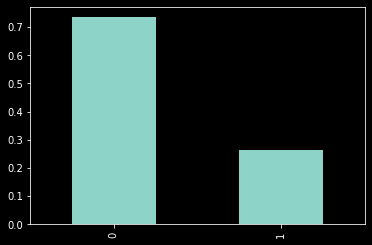

In [ ]:
plt.style.use('dark_background')
new_cleaned_df.Churn_Yes.value_counts(normalize=True).plot(kind="bar")
plt.show()

In [ ]:
X = new_cleaned_df.drop(labels=["Churn_Yes", "customerID"],axis=1)
y = new_cleaned_df.Churn_Yes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [ ]:
bigtree = DecisionTreeClassifier(max_depth=5, criterion = 'gini', splitter = 'best')

In [ ]:
tree_model = bigtree.fit(X_train, y_train)

In [ ]:
tree_model.score(X_train, y_train).round(3)

0.804

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [ ]:
accuracy_score(y_test, y_pred).round(3) # without parameters tuning, this model is 79% accurate which means it's predictions are accurate 7 out of 10 times 

0.788

In [ ]:

#trying logistic regression

In [ ]:
logic = LogisticRegression()

In [ ]:
logistic_model = logic.fit(X_train, y_train)
logistic_model.score(X_train, y_train)

0.8046194623248769

In [ ]:
accuracy_score(y_test, y_pred)      # model is only 79% accurate

0.7876206700738216

In [ ]:
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:, 0] = C 

In [ ]:
for index in range(0, len(C)):
  logic = LogisticRegression(penalty="l1", C=C[index], solver="liblinear")
  logistic_model = logic.fit(X_train, y_train)
  y_pred_optimum = logistic_model.predict(X_test)
  l1_metrics[index, 1] = np.count_nonzero(logistic_model.coef_)
  l1_metrics[index, 2] = accuracy_score(y_test, y_pred_optimum)
  l1_metrics[index, 3] = precision_score(y_test, y_pred_optimum)
  l1_metrics[index, 4] = recall_score(y_test, y_pred_optimum)
  column = ["C", "Non-Zeros Coefficients", "Accuracy", "Precision", "Recall"]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pd.DataFrame(l1_metrics, columns=column)

,C,Non-Zeros Coefficients,Accuracy,Precision,Recall
0,1.0000,25.0,0.802953,0.677922,0.539256
1,0.5000,22.0,0.803521,0.679688,0.539256
2,0.2500,21.0,0.802953,0.680739,0.533058
3,0.1000,18.0,0.805224,0.686016,0.537190
4,0.0500,14.0,0.809199,0.704420,0.526860
5,0.0250,12.0,0.806928,0.711765,0.500000
6,0.0100,8.0,0.795571,0.712329,0.429752
7,0.0050,3.0,0.789324,0.751111,0.349174
8,0.0025,2.0,0.725156,0.000000,0.000000


In [ ]:
# 0.05 looks like the optimum point at which the model complexity is optimised. accuracy is highest while still maintaining high precision and recall comparable to other C parameters

# Logistic regression

In [ ]:
logic = LogisticRegression(penalty="l1", C=0.05, solver="liblinear")

In [ ]:
logistic_model = logic.fit(X_train, y_train)
logistic_model.score(X_train, y_train)

0.8017796289284362

In [ ]:
y_pred_tuned = logistic_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_tuned)   # model is now 80% accurate

0.8091993185689949

Interpreting Logistic Regression's Coefficients

# Decision Tree Model Tuning

In [ ]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:, 0] = depth_list

In [ ]:
for index in range(0, len(depth_list)):
  # Initialize and fit decision tree with the `max_depth` candidate
  bigtree2 = DecisionTreeClassifier(max_depth=depth_list[index])
  bigtree2.fit(X_train, y_train)
  # Predict churn on the testing data
  y_pred = bigtree2.predict(X_test)
  # Calculate the recall score 
  depth_tuning[index,1] = recall_score(y_test, y_pred)
  depth_tuning[index,2] = precision_score(y_test, y_pred)
  depth_tuning[index,3] = accuracy_score(y_test, y_pred)


# Name the columns and print the array as pandas DataFrame
col_names = ['Max_Depth','Recall', 'Precision', 'Accuracy']
tree_depth = pd.DataFrame(depth_tuning, columns=col_names)
tree_depth.head(20)

,Max_Depth,Recall,Precision,Accuracy
0,2.0,0.409091,0.704626,0.790460
1,3.0,0.409091,0.704626,0.790460
2,4.0,0.477273,0.650704,0.785917
3,5.0,0.431818,0.678571,0.787621
4,6.0,0.553719,0.630588,0.788189
5,7.0,0.495868,0.657534,0.790460
6,8.0,0.500000,0.609572,0.774560
7,9.0,0.491736,0.619792,0.777399
8,10.0,0.522727,0.577626,0.763771
9,11.0,0.543388,0.566810,0.760363


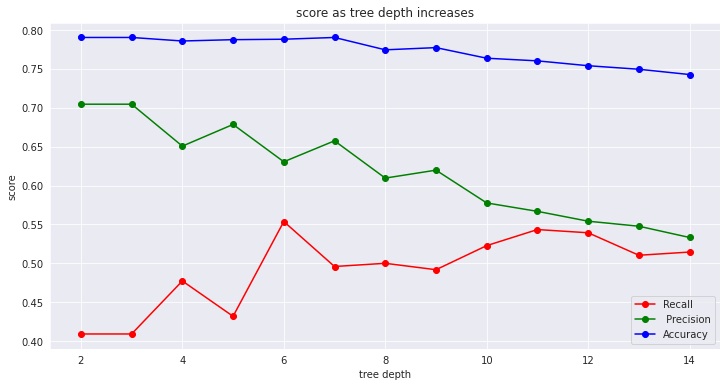

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tree_depth.Max_Depth, tree_depth.Recall, color= "red", linewidth=1.5, marker = "o" )
ax.plot(tree_depth.Max_Depth, tree_depth.Precision,  color= "green", linewidth=1.5, marker = "o" )
ax.plot(tree_depth.Max_Depth, tree_depth.Accuracy,  color= "blue", linewidth=1.5, marker = "o" )
ax.set_xlabel("tree depth")
ax.set_ylabel("score")
ax.set_title("score as tree depth increases")
ax.legend(["Recall", " Precision", "Accuracy"])
plt.show()

In [ ]:
# tree depth 6 is the optimum point that combines the right recall with model performaces recorded in accuracy and precision

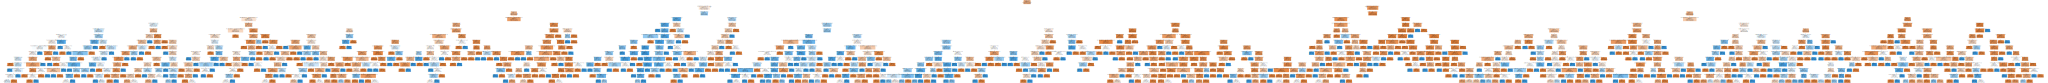

In [ ]:
exported = tree.export_graphviz(decision_tree=bigtree2, 
			# Assign feature names
            out_file=None, feature_names=X_train.columns, 
			# Set precision to 1 and add class names
			precision=1, class_names=['Not churn','Churn'], filled = True)

			

# Call the Source function and pass the exported graphviz object
graph = graphviz.Source(exported, format="png")
graph

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/Datacamp_new/machine learning for marketing/online.csv").drop("Unnamed: 0", axis=1)

In [ ]:
dff

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom
...,...,...,...,...,...,...,...,...
70859,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom
70860,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom
70861,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom
70862,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom


In [ ]:
dff.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [ ]:
# create a total_sum column

In [ ]:
dff["total_revenue"] = dff.Quantity * dff.UnitPrice

In [ ]:
# change InvoiceDate to date time and create a invoice_month column

In [ ]:
dff["InvoiceDate"] = pd.to_datetime(dff["InvoiceDate"])

In [ ]:
dff['invoice_month_of_year'] = dff['InvoiceDate'].dt.to_period('M')

In [ ]:
dff['invoice_month'] = pd.to_datetime(dff['InvoiceDate']).dt.month # extracting the month and year from the the InvoiceDate object

In [ ]:
dff['InvoiceDate'] = dff['InvoiceDate'].dt.date  # getting ride of timestamp from the date columns

In [ ]:
dff.sort_values("InvoiceDate", inplace=True) # sort InvoiceDate 

In [ ]:
dff.set_index(keys="InvoiceDate", inplace=True) # set InvoiceDate as index column

In [ ]:
clv = dff.copy()

In [ ]:
clv.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,total_revenue,invoice_month_of_year,invoice_month
InvoiceDate,,,,,,,,,,
2010-12-01,536575,85123A,WHITE HANGING HEART T-LIGHT HOLDER,128,2.55,13777,United Kingdom,326.40,2010-12,12
2010-12-01,536528,22960,JAM MAKING SET WITH JARS,1,4.25,15525,United Kingdom,4.25,2010-12,12
2010-12-01,536591,22378,WALL TIDY RETROSPOT,1,2.10,14606,United Kingdom,2.10,2010-12,12


# Calculating Various types of Customer Life-value (**CLVs**)

Basic CLV 

CLV_basic_calculator = Avg revenue OR profit * avg lifespan

In [ ]:
clv.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,total_revenue,invoice_month_of_year,invoice_month
InvoiceDate,,,,,,,,,,
2010-12-01,536575,85123A,WHITE HANGING HEART T-LIGHT HOLDER,128,2.55,13777,United Kingdom,326.40,2010-12,12
2010-12-01,536528,22960,JAM MAKING SET WITH JARS,1,4.25,15525,United Kingdom,4.25,2010-12,12


In [ ]:
# choosing an arbitrary life span of 36 months as average time before churn

In [ ]:
# CLV_basic_calculator = Avg_revenue * avg_lifespan

In [ ]:
avg_lifespan = 36

In [ ]:
avg_revenue = clv.groupby(["CustomerID", "invoice_month_of_year"]).total_revenue.sum().mean()
avg_revenue

132.62645173745173

In [ ]:
clv_basic = avg_revenue * avg_lifespan
clv_basic

4774.552262548263

Granular CLV calculation

CLV_granular_calculator = (Avg revenue/profit per purchase  * avg purchase freq * profit margin ) * avg customer lifespan

In [ ]:
Avg_revenue_per_purchase = clv.groupby(["CustomerID","InvoiceNo"]).total_revenue.mean().mean() # Average customer revenue per purchase 
Avg_revenue_per_purchase

34.80612330102385

In [ ]:
avg_purchase_freq = clv.groupby(["CustomerID", "invoice_month_of_year"]).InvoiceNo.nunique().mean()        # Average customer's number of unique transactions per month

avg_purchase_freq

1.305019305019305

In [ ]:
CLV_granular_calculator = Avg_revenue_per_purchase * avg_purchase_freq * avg_lifespan # Avg lifetime defined above

In [ ]:
CLV_granular_calculator

1635.215862265862

Importing the Cohort table dataset

In [ ]:
# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
dff_cohort = pd.read_csv("/content/drive/MyDrive/Datacamp_new/machine learning for marketing/cohort_counts.csv").set_index("CohortMonth")

In [ ]:
dff_cohort

,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = dff_cohort.iloc[:, 0]

In [ ]:
cohort_size

CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
2011-10-01    318.0
2011-11-01    291.0
2011-12-01     38.0
Name: 1, dtype: float64

In [ ]:
retention = dff_cohort.divide(cohort_size, axis=0)

In [ ]:
retention.round(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.344,0.309,0.351,0.342,0.398,0.348,0.330,0.335,0.370,0.355,0.486,0.24
2011-01-01,1.0,0.208,0.247,0.244,0.331,0.271,0.247,0.259,0.313,0.307,0.373,0.136,NaN
2011-02-01,1.0,0.184,0.180,0.263,0.269,0.234,0.253,0.263,0.272,0.301,0.089,NaN,NaN
2011-03-01,1.0,0.162,0.258,0.196,0.214,0.173,0.253,0.219,0.276,0.098,NaN,NaN,NaN
2011-04-01,1.0,0.192,0.204,0.192,0.184,0.204,0.220,0.231,0.067,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.161,0.173,0.145,0.209,0.233,0.245,0.088,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159,0.126,0.198,0.237,0.300,0.092,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.162,0.179,0.220,0.254,0.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.216,0.201,0.252,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
churn = 1 - retention

In [ ]:
retention = retention.iloc[:,1:].mean()     # first column is ommitted because the retention rate is 100 since thats the beginning of the cohort analysis
retention_rate = retention.mean() # Another mean() to get the rate
# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))
print('Churn + retention = {:.2f}'.format(retention_rate+churn_rate))

Retention rate: 0.24; Churn rate: 0.76
Churn + retention = 1.00


In [ ]:
#heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True,

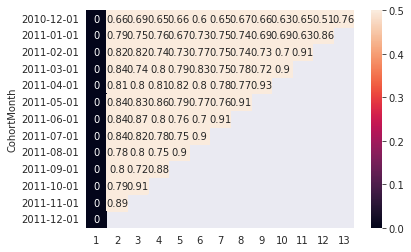

In [ ]:
sns.heatmap(churn, vmin=0, vmax=0.5, annot=True)
plt.show()

In [ ]:
clv.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,total_revenue,invoice_month_of_year,invoice_month
InvoiceDate,,,,,,,,,,
2010-12-01,536575,85123A,WHITE HANGING HEART T-LIGHT HOLDER,128,2.55,13777,United Kingdom,326.40,2010-12,12
2010-12-01,536528,22960,JAM MAKING SET WITH JARS,1,4.25,15525,United Kingdom,4.25,2010-12,12


# Traditional CLV calculation

CLV_traditional_calculator = (Avg revenue * profit ) * Retentio rate/ Churn rate

In [ ]:
Average_revenue = clv.groupby(["CustomerID", "invoice_month_of_year"]).total_revenue.sum().mean()    # calculate avg monthly revenue per customers
Average_revenue

132.62645173745173

In [ ]:
CLV_traditional_calculator = Average_revenue * (retention_rate/churn_rate)

In [ ]:
CLV_traditional_calculator

42.363776350160535

In [ ]:
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format(CLV_traditional_calculator, retention_rate*100))

Average traditional CLV is 42.4 USD at 24.2 % retention_rate


In [ ]:
"""
CLV_basic > CLV_granular because CLV_granular is more detailed i.e took customer's revenue at the level of invoice into account

CLV_granular > CLV_traditional because CLV_granular like CLV_basic make use of an arbitary avg_lifespan whereas in CLV_traditional, 
                                the avg lifespan was  infer from the dataset using the retention and churn rate from the cohort table


NOTE: CLV_traditional assumes that the churn is final and that the customer isn't coming back again

"""

"\nCLV_basic > CLV_granular because CLV_granular is more detailed i.e took customer's revenue at the level of invoice into account\n\nCLV_granular > CLV_traditional because CLV_granular like CLV_basic make use of an arbitary avg_lifespan whereas in CLV_traditional, \n                                the avg lifespan was  infer from the dataset using the retention and churn rate from the cohort table\n\n\nNOTE: CLV_traditional assumes that the churn is final and that the customer isn't coming back again\n\n"

Performing machine learning operation on the dataset

In [ ]:
df_ml = dff.copy()

In [ ]:
df_ml.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,total_revenue,invoice_month_of_year,invoice_month
InvoiceDate,,,,,,,,,,
2010-12-01,536575,85123A,WHITE HANGING HEART T-LIGHT HOLDER,128,2.55,13777,United Kingdom,326.40,2010-12,12
2010-12-01,536528,22960,JAM MAKING SET WITH JARS,1,4.25,15525,United Kingdom,4.25,2010-12,12
2010-12-01,536591,22378,WALL TIDY RETROSPOT,1,2.10,14606,United Kingdom,2.10,2010-12,12
2010-12-01,536557,22114,HOT WATER BOTTLE TEA AND SYMPATHY,1,3.95,17841,United Kingdom,3.95,2010-12,12
2010-12-01,536416,22767,TRIPLE PHOTO FRAME CORNICE,4,9.95,13255,United Kingdom,39.80,2010-12,12


In [ ]:
monthly_cust_series = df_ml.groupby("invoice_month_of_year").size()   # setting the last month 2011-12 to the target variable
monthly_cust_series

invoice_month_of_year
2010-12     4893
2011-01     3580
2011-02     3648
2011-03     4764
2011-04     4148
2011-05     5018
2011-06     4669
2011-07     4610
2011-08     4744
2011-09     7189
2011-10     8808
2011-11    11644
2011-12     3149
Freq: M, dtype: int64

Feature engineering

Using RFM technique :- Recency, Frequency and Monetary

In [ ]:
# isolate the target from feature 
#target = df_ml[df_ml["invoice_month_of_year"] == "2011-12"]
df_features = df_ml[df_ml["invoice_month_of_year"] != "2011-12"].reset_index()

In [ ]:
df_features.groupby("CustomerID")

In [ ]:
import datetime
NOW = datetime.date(2011, 12, 1)
type(NOW)


datetime.date

In [ ]:
df_features

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,total_revenue,invoice_month_of_year,invoice_month
0,2010-12-01,536575,85123A,WHITE HANGING HEART T-LIGHT HOLDER,128,2.55,13777,United Kingdom,326.40,2010-12,12
1,2010-12-01,536528,22960,JAM MAKING SET WITH JARS,1,4.25,15525,United Kingdom,4.25,2010-12,12
2,2010-12-01,536591,22378,WALL TIDY RETROSPOT,1,2.10,14606,United Kingdom,2.10,2010-12,12
3,2010-12-01,536557,22114,HOT WATER BOTTLE TEA AND SYMPATHY,1,3.95,17841,United Kingdom,3.95,2010-12,12
4,2010-12-01,536416,22767,TRIPLE PHOTO FRAME CORNICE,4,9.95,13255,United Kingdom,39.80,2010-12,12
...,...,...,...,...,...,...,...,...,...,...,...
67710,2011-11-30,579711,21592,RETROSPOT CIGAR BOX MATCHES,3,1.25,15060,United Kingdom,3.75,2011-11,11
67711,2011-11-30,579668,23313,VINTAGE CHRISTMAS BUNTING,5,4.95,15152,United Kingdom,24.75,2011-11,11
67712,2011-11-30,579885,23198,PANTRY MAGNETIC SHOPPING LIST,4,1.45,15444,United Kingdom,5.80,2011-11,11
67713,2011-11-30,579885,23567,EGG CUP HENRIETTA HEN PINK,12,1.25,15444,United Kingdom,15.00,2011-11,11


In [ ]:
# Calculate recency by subtracting current date from the latest InvoiceDate
features = df_features.groupby('CustomerID').agg({
    
                            # Calculate recency by subtracting the InvoiceDate from the snapshot date
                            'InvoiceDate': lambda x: (NOW - x.max()).days,
    
                            # Calculate frequency by counting unique number of invoices
                            'InvoiceNo': pd.Series.nunique,
    
                            # Calculate monetary value by summing all spend values
                            'total_revenue': np.sum,
    
                            # Calculate average and total quantity
                            'Quantity': ['mean', 'sum']}).reset_index()


In [ ]:
features.columns = ['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg', 'quantity_total']  # chage the whole columns in features

In [ ]:
features.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg',
       'quantity_total'],
      dtype='object')

In [ ]:
features.head(3)

,CustomerID,recency,frequency,monetary,quantity_avg,quantity_total
0,12747,14,10,690.52,10.000000,230
1,12748,2,148,7309.26,6.086188,5508
2,12749,14,3,725.85,7.718750,247


In [ ]:
# build a pivot table for the df_features dataframe

In [ ]:
cust_month_tx = pd.pivot_table(data=df_features, values= "InvoiceNo", index=['CustomerID'], columns=['invoice_month_of_year'], aggfunc=pd.Series.nunique, fill_value=0)
cust_month_tx

invoice_month_of_year,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,,,,
12747,2,1,0,1,0,2,1,0,1,0,1,1
12748,24,2,4,9,3,17,12,8,9,9,10,41
12749,0,0,0,0,0,1,0,0,1,0,0,1
12820,0,1,0,0,0,0,0,0,0,1,1,0
12822,0,0,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18277,0,0,0,0,0,0,0,0,0,0,1,0
18280,0,0,0,1,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# creating the target variable
target = ["2011-11"]

In [ ]:
y = cust_month_tx[target]

In [ ]:
y

invoice_month_of_year,2011-11
CustomerID,
12747,1
12748,41
12749,1
12820,0
12822,0
...,...
18277,0
18280,0
18281,0


In [ ]:
customer_id = ["CustomerID"]

In [ ]:
cols = [col for col in cust_month_tx.columns if col not in customer_id]

Linear Regression

In [ ]:
X = cust_month_tx[cols]
y = cust_month_tx[target]
# Split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [ ]:

# Initialize linear regression instance
linreg_model = LinearRegression()

# Fit the model to training dataset
linreg_model.fit(X_train, y_train)

# Predict the target variable for training data
y_train_pred = linreg_model.predict(X_train)

# Predict the target variable for testing data
y_test_pred = linreg_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Period']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Period']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Period']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:


# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(y_test, y_test_pred)

In [ ]:
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, 
                                                                          mae_train, mae_test))

RMSE train: 3.270158830964707e-15; RMSE test: 3.4726663758460367e-15
MAE train: 1.6873367858239553e-15, MAE test: 1.724840450116915e-15


Regression coefficient

In [ ]:
# Import `statsmodels.api`
import statsmodels.api as sm

# Initialize model instance on the training data
y_train = np.array(y_train)
olsreg = sm.OLS(y_train, X_train).fit()
print(olsreg.summary())




                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.335e+30
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:49:19   Log-Likelihood:                          84038.
No. Observations:                2747   AIC:                                 -1.681e+05
Df Residuals:                    2735   BIC:                                 -1.680e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Customer and product segmentation basics
We will build meaningful customer segments based on their product purchases.

We will use a wholesale dataset with customer transactions.

This is a customer by product purchase matrix, that has purchase data for each customer at a product level.
We will use unsupervised learning models. Here are some of the more popular models:

Hierarchical clustering
K-means
Non-negative matrix factorization (NMF)
Biclustering
Gaussian mixture models (GMM)
And many more
Explore customer product purchase dataset
We are now ready to plot some exploratory charts to understand the distribution of the variables and relationships between them. Here, we will explore the wholesale dataset and plot the pairwise relationships as well as the estimated distributions for each variable with the pairplot function from the seaborn library. It's an important step to explore the distribution types, and the relationships between the variables to inform the need for further data preprocessing.

In [ ]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
wholesale = pd.read_csv(file_path)

In [ ]:
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Drop channels and region columns

In [ ]:
wholesale.drop(['Channel', 'Region'], axis=1, inplace=True)

In [ ]:
df_wholesale = wholesale.copy()

In [ ]:
df_wholesale.head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788


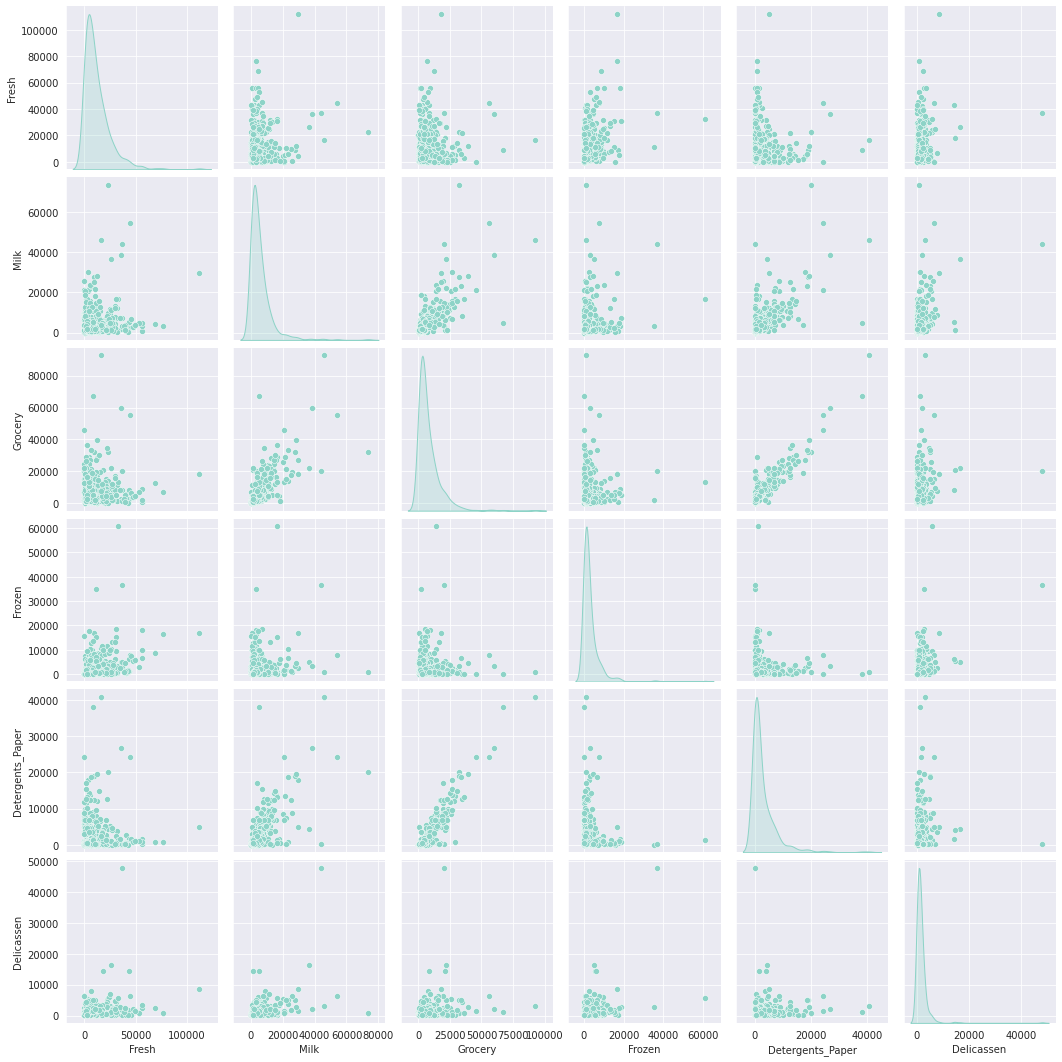

In [ ]:
# visualise the dataset using a pairwais plot
sns.pairplot(data=df_wholesale, diag_kind="kde")
plt.show()
#  Looking at the diagonal plot, the estimated distribution are highly skewed to the right

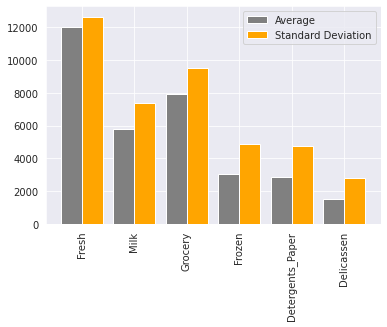

In [ ]:
# Get the statistics
averages = df_wholesale.mean()
std_devs = df_wholesale.std()

# Create column names list and same length integer list
col_names = wholesale.columns
col_index = np.arange(df_wholesale.shape[1])

# Plot the averages data in gray and standard deviations in orange 
plt.bar(x=col_index-0.2, height=averages, color='grey', label='Average', width=0.4)
plt.bar(x=col_index+0.2, height=std_devs, color='orange', label='Standard Deviation', width=0.4)

# Add x-axis labels and rotate
plt.xticks(ticks=col_index, labels=col_names, rotation=90)

# Add the legend and display the chart
plt.legend()
plt.show()          # the visuals gives a sense of the disparity between the products in terms of their mean and std
                    # in general high std shows data are far away from the mean, and low std mean that the data points are mostly clustered around the mean

# Customer segmentation data preprocessing

**Model assumptions**

First we'll start with K-means


*  K-means clustering works well when data is 1) ~normally distributed (no skew), and 2) standardized (mean = 0, standard deviation = 1)

*  Second model - NMF - can be used on raw data, especially if the matrix is sparse

**Unskew the variables**

We will now transform the wholesale columns using Box-Cox transformation, and then explore the pairwise relationships plot to make sure the skewness of the distributions has been reduced to make them more normal. This is a critical step to make sure the K-means algorithm converges and discovers homogeneous groups (a.k.a. clusters or segments) of observations.

[]

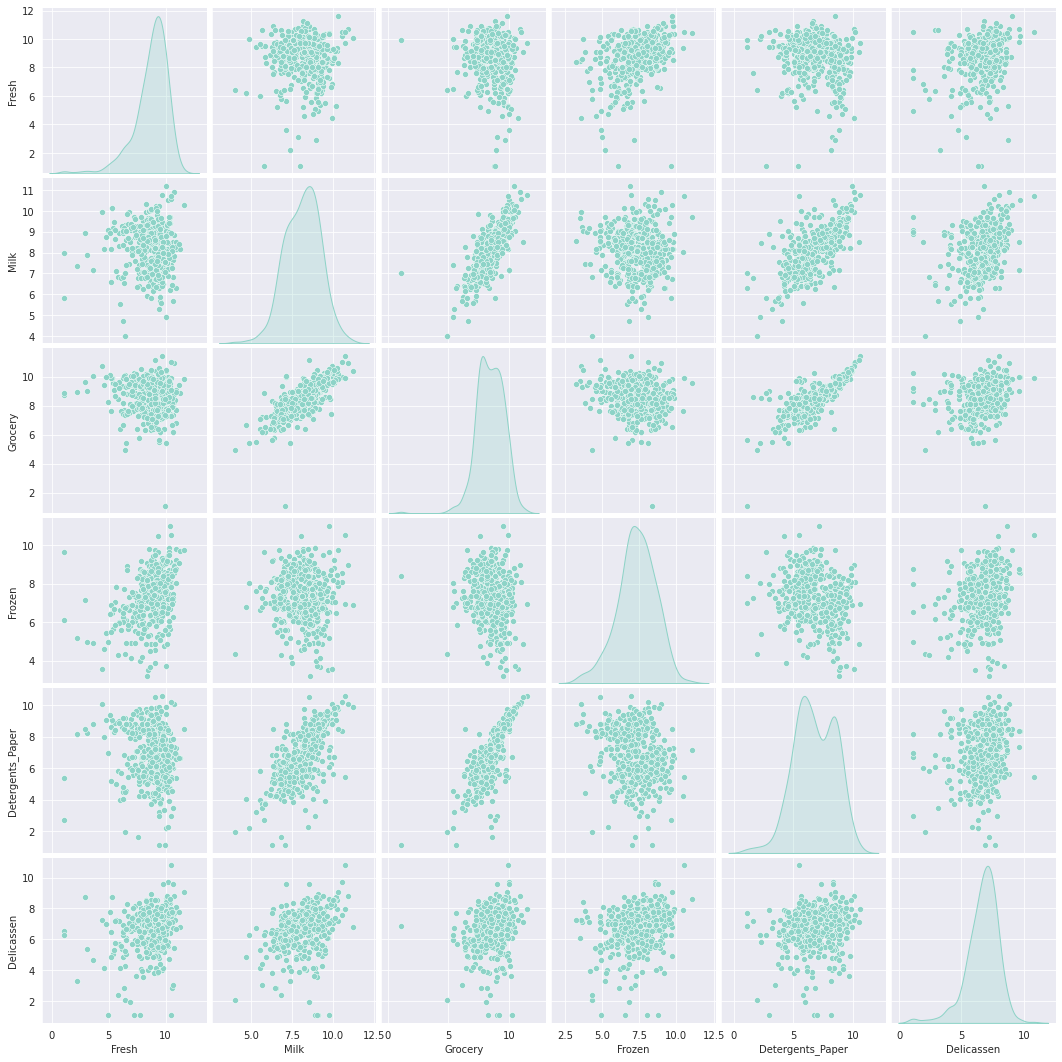

In [ ]:
# perform normalisation using log transformation
wholesale_log_transform = np.log(df_wholesale)
sns.pairplot(data = wholesale_log_transform, diag_kind="kde")
plt.plot()

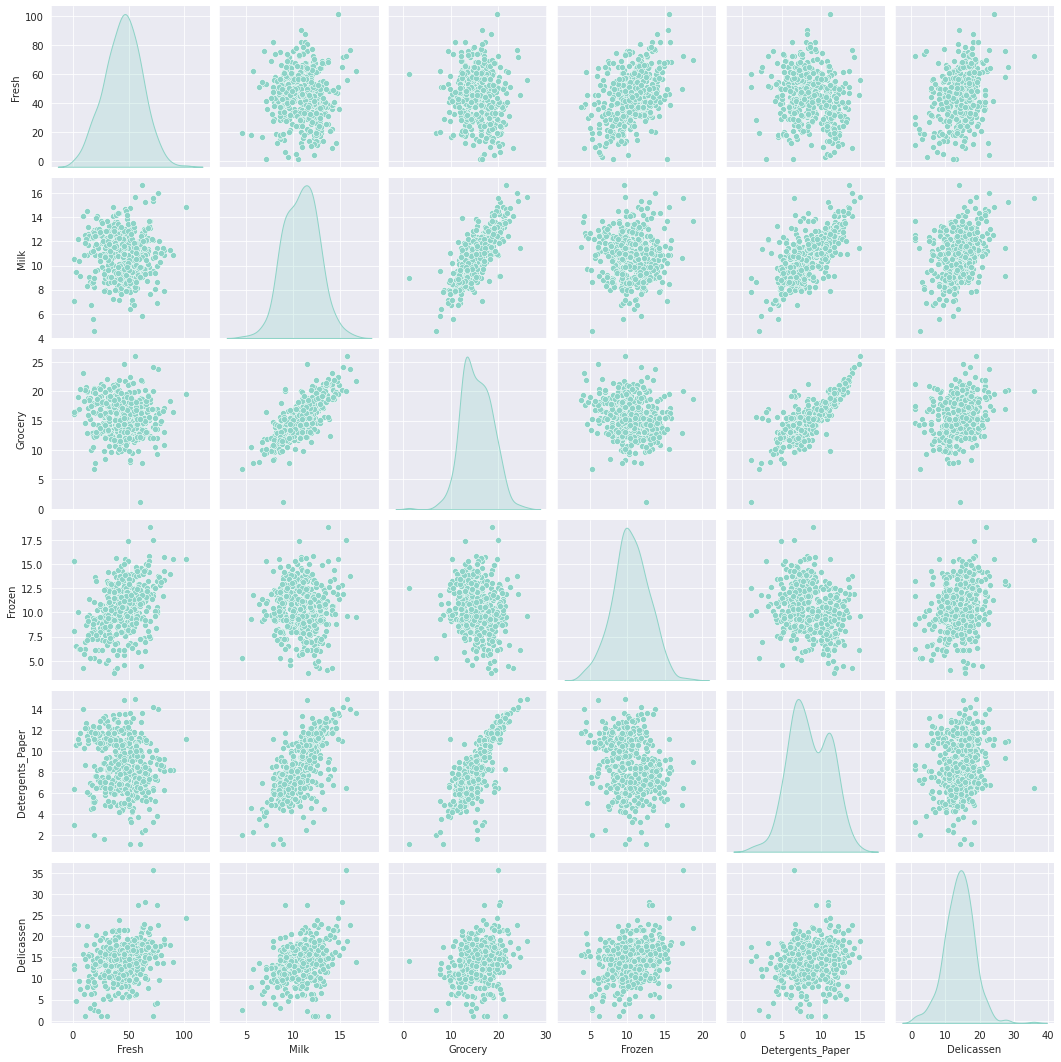

In [ ]:
from scipy import stats

# Define custom Box Cox transformation function
def wholesale_boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

# Apply the function to the `wholesale` dataset
wholesale_boxcox = df_wholesale.apply(wholesale_boxcox_df, axis=0)

# Plot the pairwise relationships between the transformed variables 
sns.pairplot(wholesale_boxcox, diag_kind='kde')

# Display the chart
plt.show()                      # the transformation is better here than log transformation

In [ ]:
wholesale_scaler = StandardScaler().fit(wholesale_boxcox)   # initialise StandardScaler and fit the wholesale_boxcox dataframe
wholesale_boxcox_scaled = wholesale_scaler.transform(wholesale_boxcox) # transform the wholesale_boxcox dataset

In [ ]:
wholesale_boxcox_scaled = pd.DataFrame(wholesale_boxcox_scaled, columns=df_wholesale.columns)     # converting back to dataframe
wholesale_boxcox_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.412646,0.979303,0.392937,-1.456705,0.617238,0.335779
1,-0.111180,0.995096,0.626729,0.079718,0.748629,0.599877
2,-0.196043,0.887891,0.408738,0.331996,0.790324,2.245295
3,0.457763,-0.965094,-0.156523,1.173643,-0.373844,0.606332
4,1.028704,0.412455,0.344961,0.741520,0.364211,1.738881
...,...,...,...,...,...,...
435,1.357112,1.201976,1.164326,1.839607,-0.935948,0.811050
436,1.720545,-0.808552,-1.550221,0.863813,-1.285593,0.873759
437,0.549059,1.458163,1.876742,-0.968503,1.750367,0.647978
438,0.216004,-0.519911,-0.712014,-0.333575,-0.978393,0.774734


In [ ]:
wholesale_boxcox_scaled.agg({"mean", "std"}).round() # the data is standardized and mean(s) are 0 or close to 0, while stds are 1s

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


Determine the optimal number of clusters

using the wholesale_boxcox_scaled dataframe

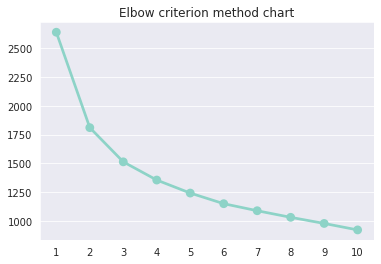

In [ ]:


# Create empty sse dictionary
sse = {}

# Fit KMeans algorithm on k values between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(wholesale_boxcox_scaled)
    sse[k] = kmeans.inertia_

# Add the title to the plot
plt.title('Elbow criterion method chart')

# Create and display a scatter plot
#sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()        # the optimum bill pack point is beterrn 3 and 4

Build segmentation with k-means clustering

with k = 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=7)
kmeans.fit(wholesale_boxcox_scaled)
wholesale_boxcox_scaled_kmeans = df_wholesale.assign(segment = kmeans.labels_)

In [ ]:
wholesale_boxcox_scaled_kmeans.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2


Non-negative matrix factorization technique

In [ ]:
# Import the non-negative matrix factorization module
from sklearn.decomposition import NMF

# Initialize NMF instance with 3 components
nmf = NMF(n_components=3, random_state=7)

# Fit the model on the wholesale sales data
nmf.fit(df_wholesale)

# Extract the components 
components = pd.DataFrame(data=nmf.components_ , columns=df_wholesale.columns)
components.head() # this must be transformed before plotting 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,642.621733,0.000000,40.241499,0.000000,0.000000,3.069453
1,1.151420,249.056414,410.032578,0.000000,185.835443,22.050947
2,0.569411,212.534786,15.247241,350.253238,0.000000,129.701443


Visualising the segements built from KMeans in heatmap

In [ ]:
wholesale_boxcox_scaled_kmeans.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2


In [ ]:
kmeans_segment_average = wholesale_boxcox_scaled_kmeans.groupby("segment").mean().round()
kmeans_segment_average

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
segment,,,,,,
0,19497.0,3497.0,3860.0,5427.0,655.0,1605.0
1,8583.0,1582.0,2150.0,1984.0,372.0,560.0
2,14352.0,14010.0,17745.0,3634.0,7060.0,3624.0
3,4028.0,7136.0,12488.0,750.0,5535.0,784.0


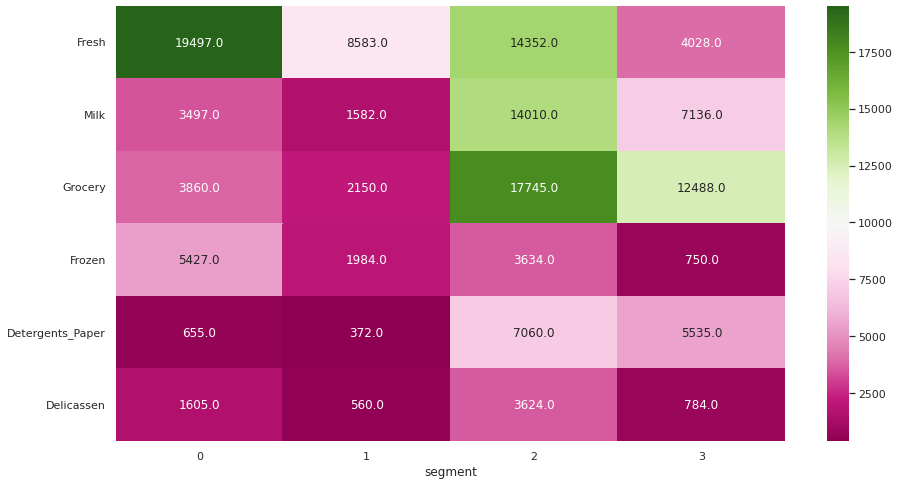

In [ ]:
# Create a heatmap on the average column values per each segment
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("darkgrid")

# T = Transpose, helps transpose the data in the heatmap to make it more readable

sns.heatmap(kmeans_segment_average.T, cmap='PiYG', annot=True, fmt=".1f", annot_kws={"size": 12})
plt.show()

NMF segmentation heatmap

In [ ]:
# Create the W matrix
segment_weight = pd.DataFrame(data=nmf.transform(df_wholesale), columns=components.index)
segment_weight.index = df_wholesale.index

segment_weight.head()

,0,1,2
0,19.522341,20.069610,6.225414
1,10.859288,23.770245,8.612944
2,9.797183,19.317171,14.280285
3,20.786390,3.631976,13.775000
4,35.222412,12.536221,13.465621


In [ ]:
# Assign the column name where the corresponding value is the largest
df_wholesale_nmf3 = df_wholesale.assign(segment = segment_weight.idxmax(axis=1))

wholesale_nmf3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [ ]:
segmented_df_wholesale = df_wholesale_nmf3.groupby("segment").mean().round()
segmented_df_wholesale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
segment,,,,,,
0,18995.0,3159.0,4073.0,3175.0,864.0,1336.0
1,4973.0,9470.0,14228.0,1347.0,6167.0,1518.0
2,6164.0,4691.0,3506.0,8220.0,503.0,2314.0


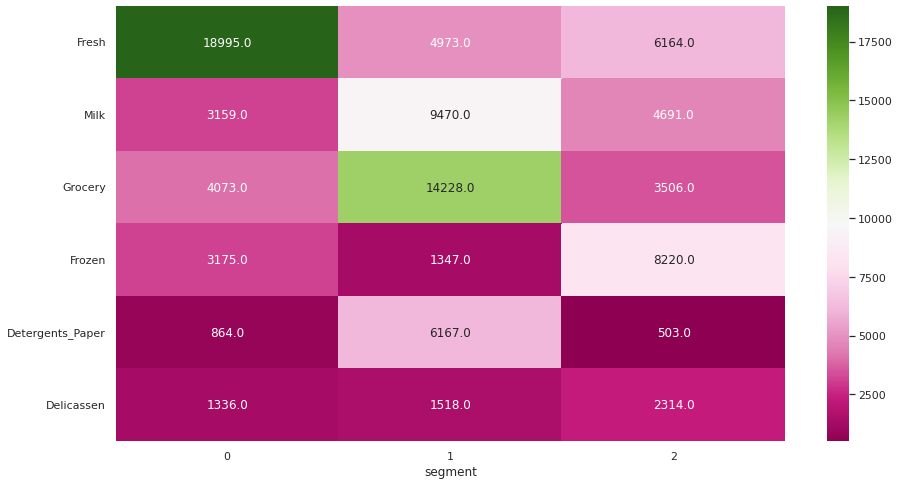

In [ ]:
# Create a heatmap on the average column values per each segment
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("darkgrid")

# T = Transpose, helps transpose the data in the heatmap to make it more readable

sns.heatmap(segmented_df_wholesale.T, cmap='PiYG', annot=True, fmt=".1f", annot_kws={"size": 12})
plt.show()